# Misharin (GSE127803) - processed.h5ad
Mice aged 8-10 weeks were instilled intratracheally with control particles or crocidolite asbestos fibers to induce lung fibrosis. Lungs were then harvested at different time points (depending on the analysis method).

Single-cell RNA sequencing was done on a HiSeq 4000 instrument (Illumina) using Chromium Single Cell v2 Reagent Kit and Controller for the library preparation.

In [64]:
import scanpy
import pandas as pd
import scib
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import anndata
import helper_classes_DanielStrobl
plt.rcParams['figure.figsize'] = (15, 15)

#Import necessary packages
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
#Must be activated
pandas2ri.activate()

scanpy.settings.verbosity = 0
scanpy.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

R[write to console]: Error in value[[3L]](cond) : 
  unable to load shared object '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/methods.so':
  dlopen(/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/methods.so, 0x0006): Library not loaded: @rpath/libreadline.6.2.dylib
  Referenced from: <185433D7-8B40-31AA-8BD9-465D23C57257> /usr/local/Caskroom/miniconda/base/lib/R/lib/libR.dylib
  Reason: tried: '/usr/local/Caskroom/miniconda/base/lib/R/lib/../../libreadline.6.2.dylib' (no such file), '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/../../../../libreadline.6.2.dylib' (no such file), '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/../../../../libreadline.6.2.dylib' (no such file), '/usr/lib/libreadline.6.2.dylib' (no such file, not in dyld cache)



RRuntimeError: Error in value[[3L]](cond) : 
  unable to load shared object '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/methods.so':
  dlopen(/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/methods.so, 0x0006): Library not loaded: @rpath/libreadline.6.2.dylib
  Referenced from: <185433D7-8B40-31AA-8BD9-465D23C57257> /usr/local/Caskroom/miniconda/base/lib/R/lib/libR.dylib
  Reason: tried: '/usr/local/Caskroom/miniconda/base/lib/R/lib/../../libreadline.6.2.dylib' (no such file), '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/../../../../libreadline.6.2.dylib' (no such file), '/usr/local/Caskroom/miniconda/base/lib/R/library/methods/libs/../../../../libreadline.6.2.dylib' (no such file), '/usr/lib/libreadline.6.2.dylib' (no such file, not in dyld cache)


In [38]:
base = "GSE127803_RAW"
misharin = scanpy.read(base + '/processed.h5ad')   # read in data

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/h5ad.py:280: OldFormatWarning: '/obs' was written with a very old version of AnnData. Consider rewriting it.
  warn(
/Libr

In [65]:
misharin

AnnData object with n_obs × n_vars = 15365 × 17117
    obs: 'batch', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'louvain', 'mish_clusters', 'louvain_epi', 'louvain_macro', 'louvain_fibro', 'epi_all_score', 'is_krt8', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'is_krt8_colors', 'louvain', 'louvain_colors', 'louvain_fibro_colors', 'neighbors', 'pca', 'rank_genes_groups', 'cond_colors', 'mish_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

## Analyse QC

In [39]:
misharin.var_names_make_unique()
misharin

AnnData object with n_obs × n_vars = 15365 × 17117
    obs: 'batch', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'louvain', 'mish_clusters', 'louvain_epi', 'louvain_macro', 'louvain_fibro', 'epi_all_score', 'is_krt8'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'is_krt8_colors', 'louvain', 'louvain_colors', 'louvain_fibro_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

### Filtering low quality reads:

In [48]:
# mitochondrial genes
misharin.var["mt"] = misharin.var_names.str.startswith("MT-", "mt-")
# ribosomal genes
misharin.var["ribo"] = misharin.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
misharin.var["hb"] = misharin.var_names.str.contains(("^HB[^(P)]"))

In [49]:
scanpy.pp.calculate_qc_metrics(
    misharin, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
misharin

AnnData object with n_obs × n_vars = 15365 × 17117
    obs: 'batch', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'louvain', 'mish_clusters', 'louvain_epi', 'louvain_macro', 'louvain_fibro', 'epi_all_score', 'is_krt8', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'is_krt8_colors', 'louvain', 'louvain_colors', 'louvain_fibro_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities

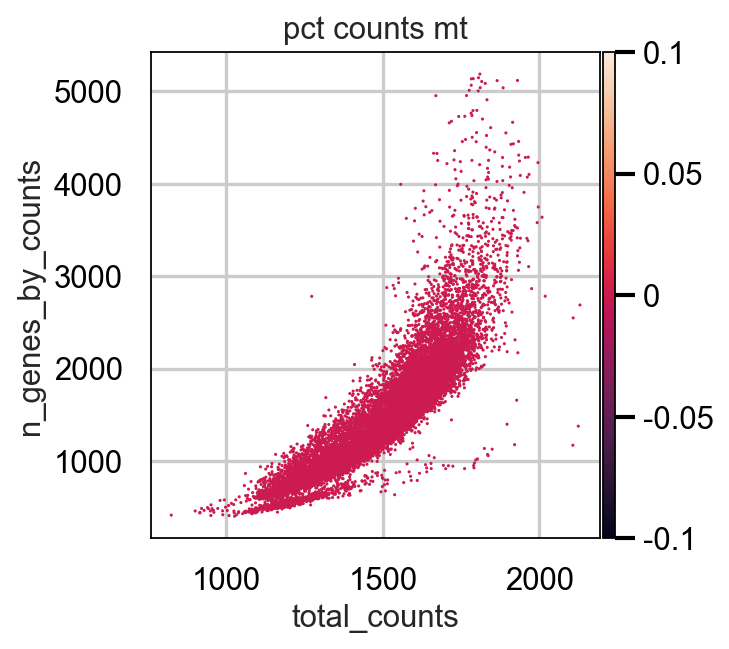

In [56]:
scanpy.pl.scatter(misharin, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Doublet detection:

In [33]:
%%R
library(Seurat)
library(scater)
library(scDblFinder)
library(BiocParallel)

UsageError: Cell magic `%%R` not found.


## Normalization

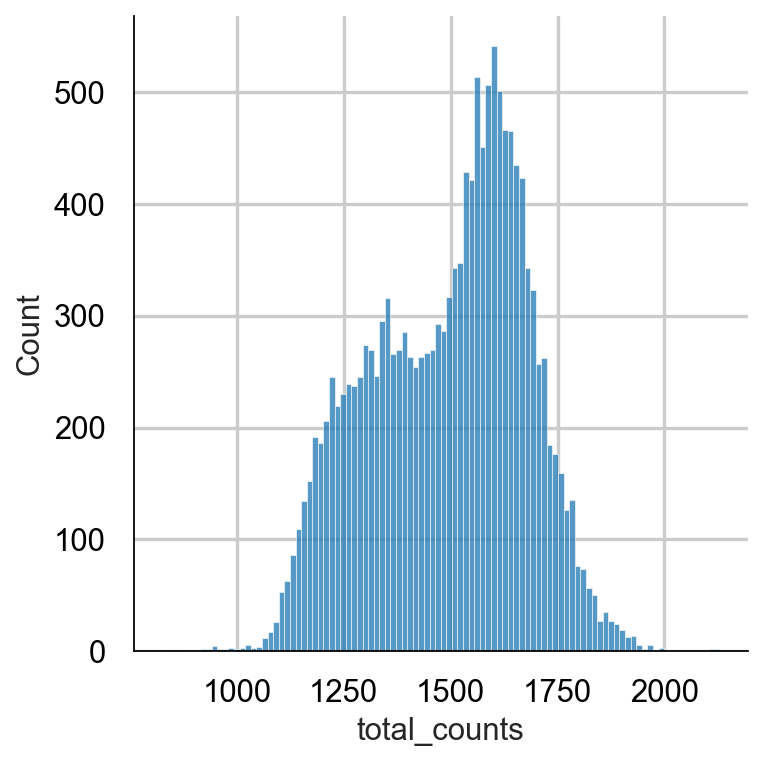

In [54]:
sns.displot(misharin.obs["total_counts"], bins=100, kde=False)

## PCA

In [19]:
scanpy.pp.pca(misharin, svd_solver="arpack", use_highly_variable=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


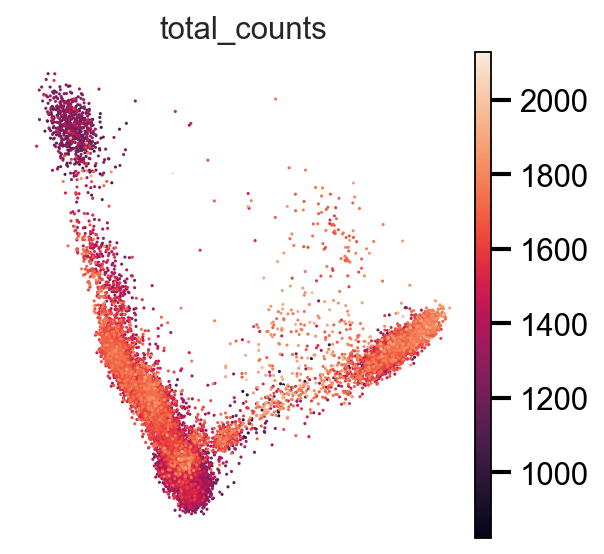

In [57]:
scanpy.pl.pca_scatter(misharin, color="total_counts")

In [21]:
scanpy.pp.neighbors(misharin)
scanpy.tl.umap(misharin)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


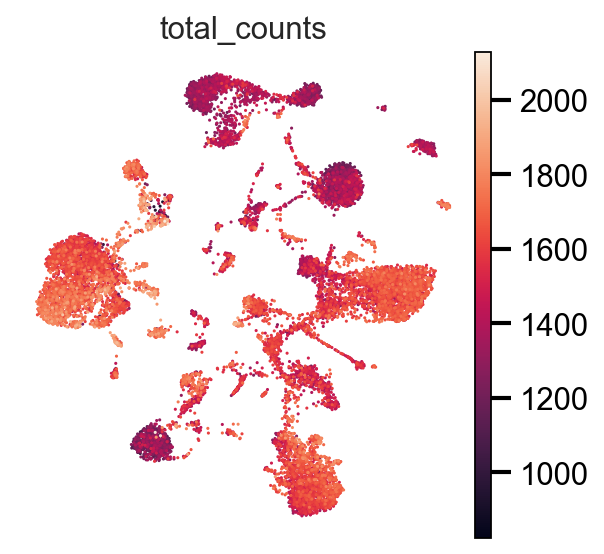

In [58]:
scanpy.pl.umap(misharin, color="total_counts")

In [29]:
misharin.obs['cond']='control'
misharin.obs.loc[misharin.obs.batch=='1', 'cond']='fibrosis'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


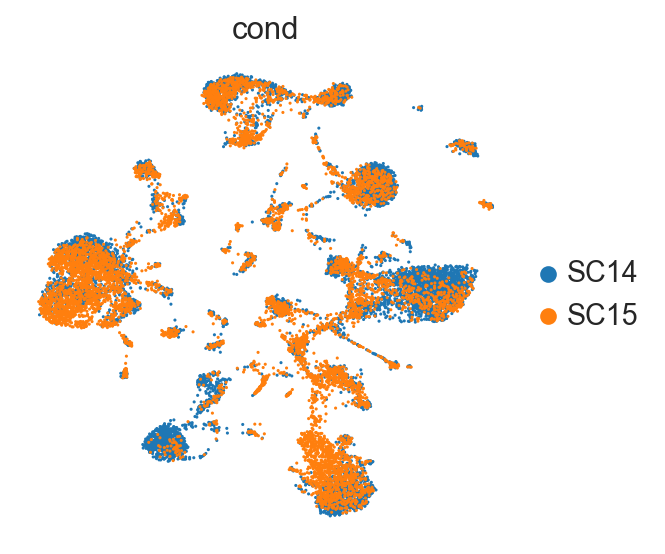

In [59]:
scanpy.pl.umap(misharin, color="cond")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


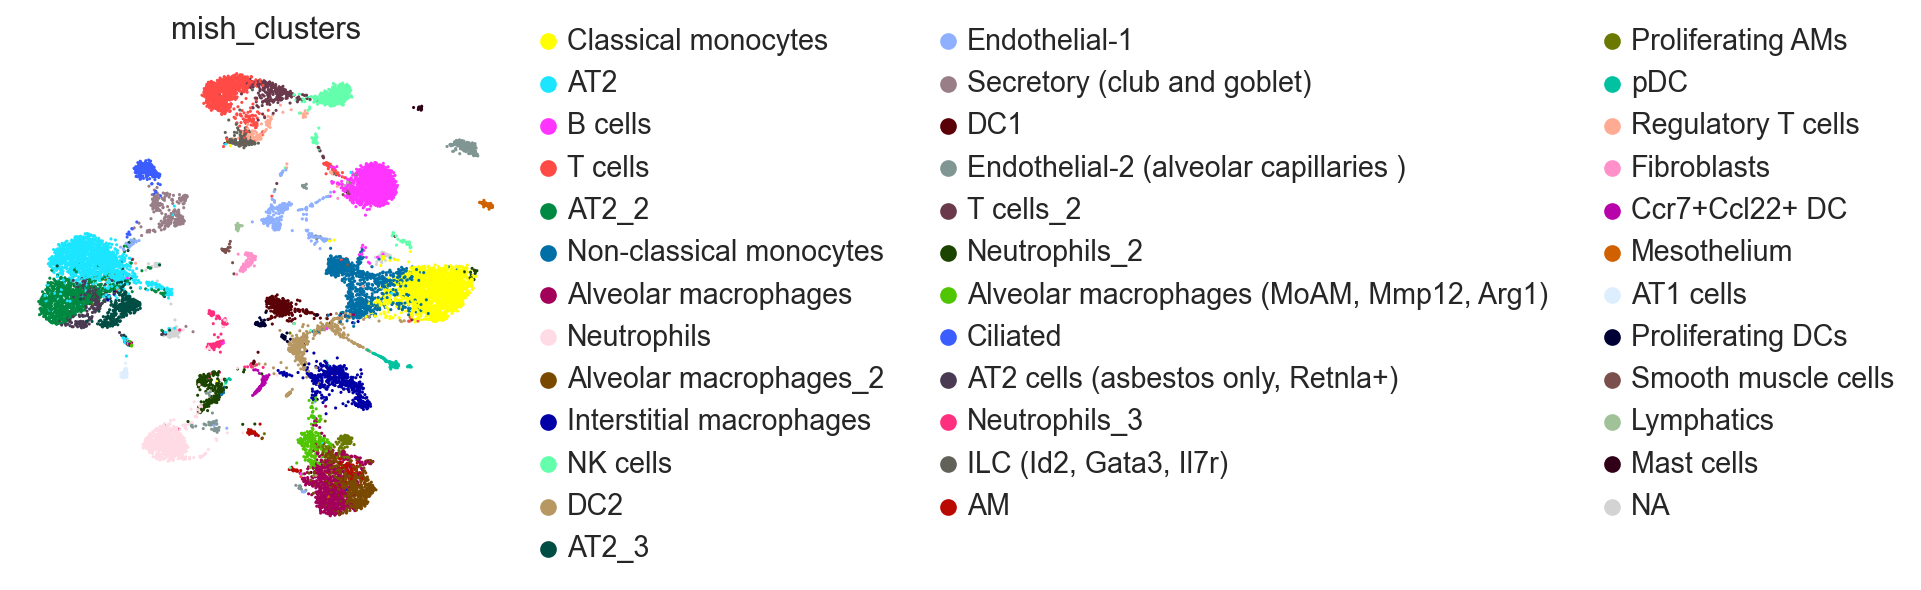

In [60]:
scanpy.pl.umap(misharin, color="mish_clusters")